Test Accuracy: 0.9708355228586443

Classification Report:

                         precision    recall  f1-score   support

              Excellent       0.98      0.96      0.97       153
                   Good       0.95      0.98      0.96       326
                   Poor       0.97      0.96      0.97      1063
Unsuitable for Drinking       0.99      0.99      0.99      1322
Very Poor yet Drinkable       0.95      0.96      0.96       942

               accuracy                           0.97      3806
              macro avg       0.97      0.97      0.97      3806
           weighted avg       0.97      0.97      0.97      3806


Cross-validation accuracy scores: [0.97162375 0.96899632 0.97083552 0.97057278 0.97319317]
Mean CV Accuracy: 0.9710443086267413


<Figure size 800x600 with 0 Axes>

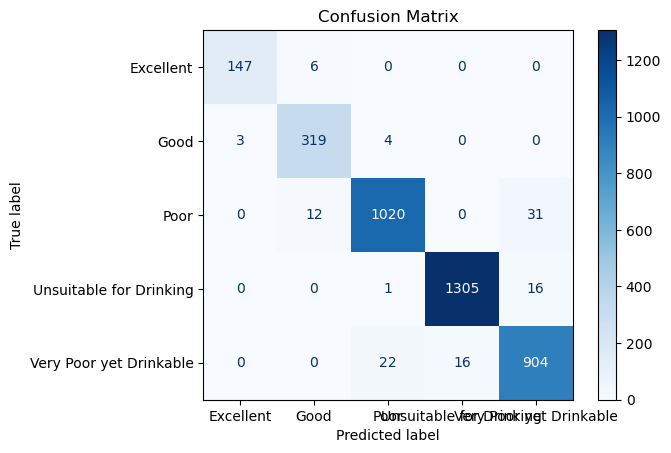

/var/folders/hk/4xmkxc4s14b937rm1vr0br9c0000gn/T/ipykernel_1485/2953237751.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


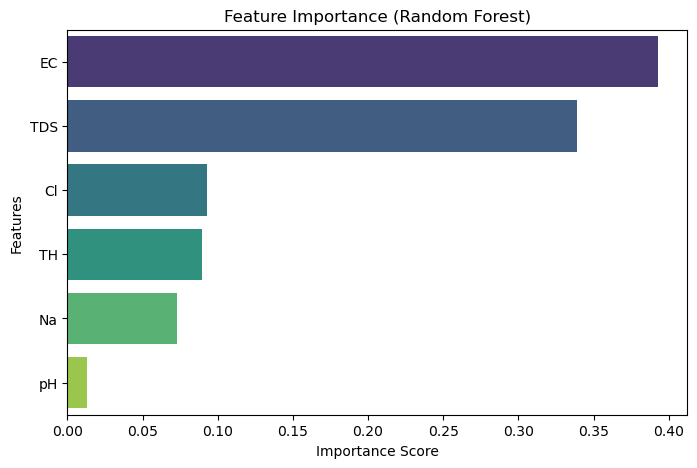


Feature Importances:
EC     0.392772
TDS    0.338760
Cl     0.093062
TH     0.089662
Na     0.072652
pH     0.013092
dtype: float64

✅ Model saved as water_quality_rf_model.pkl (with pH included)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import joblib

# ---------------------------
# Step 1: Load dataset
# ---------------------------
df = pd.read_csv("waterDataset.csv")

# ✅ Features now include pH
X = df[["EC", "TDS", "Na", "TH", "Cl", "pH"]]   
y = df["Water Quality Classification"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# Step 2: Train model
# ---------------------------
model = RandomForestClassifier(
    random_state=42, 
    n_estimators=200, 
    max_depth=12
)
model.fit(X_train, y_train)

# ---------------------------
# Step 3: Evaluate on test set
# ---------------------------
y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ---------------------------
# Step 4: Cross-validation
# ---------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")

print("\nCross-validation accuracy scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# ---------------------------
# Step 5: Confusion Matrix Visualization
# ---------------------------
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# ---------------------------
# Step 6: Feature Importance Plot
# ---------------------------
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

print("\nFeature Importances:")
print(importances)

# ---------------------------
# Step 7: Save model
# ---------------------------
joblib.dump(model, "water_quality_rf_model.pkl")
print("\n✅ Model saved as water_quality_rf_model.pkl (with pH included)")